In [1]:
import numpy as np
import pandas as pd

import os

# import model related libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import module to calculate model perfomance metrics
from sklearn import metrics

In [10]:
data = pd.read_csv('Salary_Data.csv')

In [12]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [14]:
data.sample(7)

,YearsExperience,Salary
2,1.5,37731.0
9,3.7,57189.0
23,8.2,113812.0
6,3.0,60150.0
14,4.5,61111.0
4,2.2,39891.0
3,2.0,43525.0


In [16]:
data.shape

(30, 2)

In [17]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## Describe data statistically 

In [18]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Data Cleaning

In [20]:
data.shape

(30, 2)

In [21]:
data=data.drop_duplicates()

In [22]:
data.shape

(30, 2)

In [24]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Create dependent(y) and independent(X) variables

In [33]:
target_feature='Salary'
y=data[target_feature]
X=data.drop(target_feature,axis=1)

In [38]:
X.shape

(30, 1)

In [40]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [42]:
y.shape

(30,)

In [43]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

## Data visualization before training the model

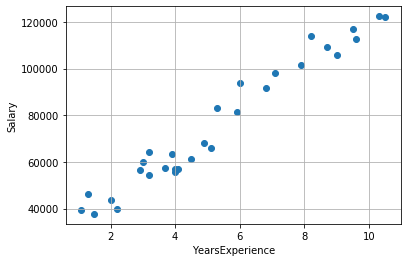

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid()
plt.show()

## Splitting X and y into training and testing sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24, 1), (24,), (6, 1), (6,))

## Apply linear regression on train dataset 

In [58]:
# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print("Intercept=",linreg.intercept_)
print("Slope=",linreg.coef_)

Intercept= 26780.099150628186
Slope= [9312.57512673]


## Apply the model on test dataset to get the predicted values 

In [60]:
y_pred = linreg.predict(X_test)

In [61]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

## Compare actual output values to the predicted values 

In [62]:
data1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'variance':y_test-y_pred})

In [63]:
data1

,Actual,Predicted,variance
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


## Prediction 

In [65]:
# Predicting the salary for 1.5 years of experience 
pred=np.array([1.5]).reshape(-1,1)

In [67]:
linreg.predict(pred)

array([40748.96184072])

## Visualization

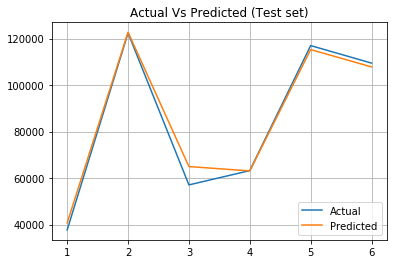

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(1,len(y_test)+1)

plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)


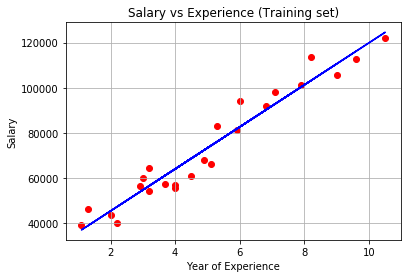

In [69]:
#Visualizing the test set result 
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, linreg.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

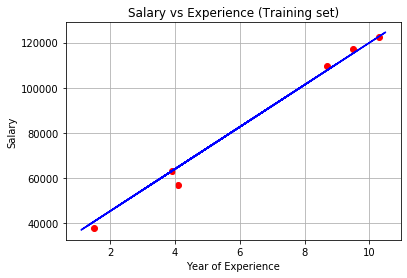

In [74]:
#Visualizing the test set result 
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, linreg.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

## Evaluation Metrics 

In [75]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
print("score",score)

score 98.8169515729126


In [76]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345
